<a href="https://colab.research.google.com/github/fradeur/capstone/blob/main/train_yolov12_object_detection_hh_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# Question 6 – Transmission Time Distribution Analysis

We analyze the probability distribution that best fits the message transmission time (50 data samples).




### Load the Data


In [ ]:
import numpy as np

# Transmission time data (in milliseconds)
data = np.array([5.3, 3.9, 5.4, 4.4, 5.1, 4.2, 5.6, 5.5, 6.2, 3.8,
                 5.3, 5.5, 4.6, 3.9, 6.4, 3.8, 5.0, 4.2, 5.1, 5.1,
                 5.4, 4.6, 5.1, 5.2, 3.8, 5.0, 5.7, 6.2, 5.4, 5.0,
                 6.0, 6.3, 2.6, 2.7, 4.5, 4.8, 2.8, 6.2, 5.4, 4.3,
                 4.3, 5.5, 4.6, 5.3, 5.0, 4.8, 4.4, 6.2, 5.4, 4.9])

### Estimate Parameters



In [ ]:
from scipy import stats

# Normal distribution parameters
mu, std = np.mean(data), np.std(data)
print(f"Normal Distribution: μ = {mu:.2f}, σ = {std:.2f}")

# Exponential distribution parameter
lambda_exp = 1 / mu
print(f"Exponential Distribution: λ = {lambda_exp:.2f}")

Normal Distribution: μ = 4.91, σ = 0.89
Exponential Distribution: λ = 0.20


### Kolmogorov–Smirnov Test

In [ ]:
ks_normal = stats.kstest(data, 'norm', args=(mu, std))
ks_exp = stats.kstest(data, 'expon', args=(0, 1/lambda_exp))

print("Kolmogorov–Smirnov Test (Normal):", ks_normal)
print("Kolmogorov–Smirnov Test (Exponential):", ks_exp)


Kolmogorov–Smirnov Test (Normal): KstestResult(statistic=np.float64(0.11867733710777167), pvalue=np.float64(0.4476319957664052), statistic_location=np.float64(5.0), statistic_sign=np.int8(-1))
Kolmogorov–Smirnov Test (Exponential): KstestResult(statistic=np.float64(0.478512713347586), pvalue=np.float64(4.779594505398618e-11), statistic_location=np.float64(3.8), statistic_sign=np.int8(-1))


## Anderson–Darling Test

In [ ]:
ad_result = stats.anderson(data, dist='norm')
print("Anderson–Darling Test (Normal)")
print(f"Statistic: {ad_result.statistic}")
for sl, cv in zip(ad_result.significance_level, ad_result.critical_values):
    print(f"Significance Level {sl}%: Critical Value = {cv}")


Anderson–Darling Test (Normal)
Statistic: 0.6591096160742822
Significance Level 15.0%: Critical Value = 0.538
Significance Level 10.0%: Critical Value = 0.613
Significance Level 5.0%: Critical Value = 0.736
Significance Level 2.5%: Critical Value = 0.858
Significance Level 1.0%: Critical Value = 1.021


## Final Conclusion

Estimated Normal Parameters: μ = 4.91, σ = 0.89
Estimated Exponential Parameter: λ = 0.20

Kolmogorov–Smirnov Test for Normal Distribution:
  Statistic = 0.1187, p-value = 0.4476
  ➤ Conclusion: Data follows a normal distribution (fail to reject H₀)

Kolmogorov–Smirnov Test for Exponential Distribution:
  Statistic = 0.4785, p-value = 0.000000
  ➤ Conclusion: Data does NOT follow an exponential distribution (reject H₀)

Anderson–Darling Test for Normal Distribution:
  Statistic = 0.6591
  Significance level 15.0%: Critical value = 0.538
  Significance level 10.0%: Critical value = 0.613
  Significance level 5.0%: Critical value = 0.736
  Significance level 2.5%: Critical value = 0.858
  Significance level 1.0%: Critical value = 1.021
  ➤ Conclusion: Data follows a normal distribution (statistic < critical value at 5%)


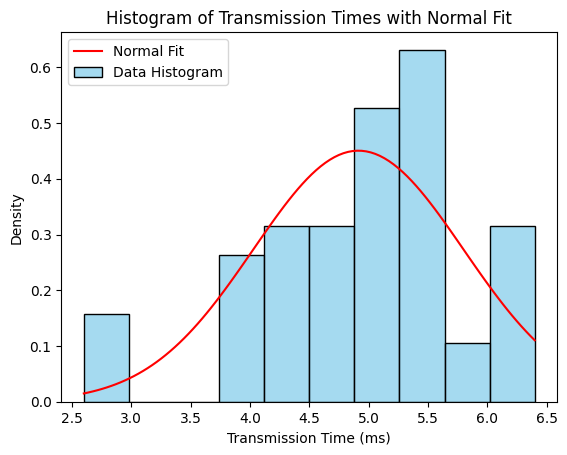

In [ ]:
# Estimated parameters
mu, std = np.mean(data), np.std(data)
lambda_exp = 1 / mu

# Run KS tests
ks_normal = stats.kstest(data, 'norm', args=(mu, std))
ks_exp = stats.kstest(data, 'expon', args=(0, 1 / lambda_exp))

# Run Anderson-Darling test for normality
ad_result = stats.anderson(data, dist='norm')

# --- Results ---
print(f"Estimated Normal Parameters: μ = {mu:.2f}, σ = {std:.2f}")
print(f"Estimated Exponential Parameter: λ = {lambda_exp:.2f}\n")

print("Kolmogorov–Smirnov Test for Normal Distribution:")
print(f"  Statistic = {ks_normal.statistic:.4f}, p-value = {ks_normal.pvalue:.4f}")
if ks_normal.pvalue > 0.05:
    print("  ➤ Conclusion: Data follows a normal distribution (fail to reject H₀)")
else:
    print("  ➤ Conclusion: Data does NOT follow a normal distribution (reject H₀)")

print("\nKolmogorov–Smirnov Test for Exponential Distribution:")
print(f"  Statistic = {ks_exp.statistic:.4f}, p-value = {ks_exp.pvalue:.6f}")
if ks_exp.pvalue > 0.05:
    print("  ➤ Conclusion: Data follows an exponential distribution (fail to reject H₀)")
else:
    print("  ➤ Conclusion: Data does NOT follow an exponential distribution (reject H₀)")

print("\nAnderson–Darling Test for Normal Distribution:")
print(f"  Statistic = {ad_result.statistic:.4f}")
for sl, cv in zip(ad_result.significance_level, ad_result.critical_values):
    print(f"  Significance level {sl}%: Critical value = {cv:.3f}")
if ad_result.statistic < ad_result.critical_values[2]:  # 5% significance level
    print("  ➤ Conclusion: Data follows a normal distribution (statistic < critical value at 5%)")
else:
    print("  ➤ Conclusion: Data does NOT follow a normal distribution (statistic > critical value at 5%)")

# === Plot Histogram with Fit ===
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of data
sns.histplot(data, bins=10, kde=False, stat='density', color='skyblue', label='Data Histogram')

# Normal distribution fit line
x_vals = np.linspace(min(data), max(data), 100)
pdf_normal = stats.norm.pdf(x_vals, mu, std)
plt.plot(x_vals, pdf_normal, 'r-', label='Normal Fit')

plt.legend()
plt.title("Histogram of Transmission Times with Normal Fit")
plt.xlabel("Transmission Time (ms)")
plt.ylabel("Density")
plt.show()
